# Práctico 1 - Representación de Sistemas y PID
## Caso de estudio N° 1: Sistema de dos variables de estado

1- Asignar valores a R=4,7KOhm, L=10uHy, y C=100nF. Obtener simulaciones que permitan estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada 1ms cambia de signo.

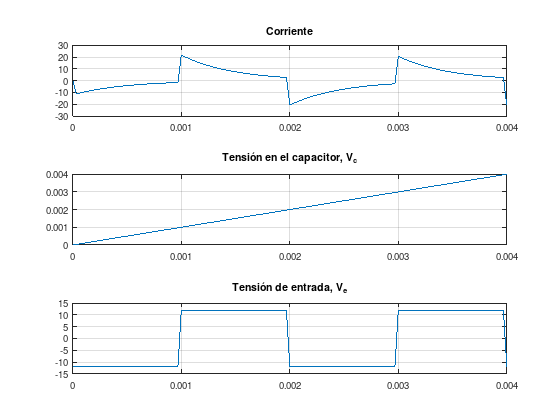

In [1]:
clc;clear all;close all;
% Generamos señal de entrada:
% Onda cuadrada alterna de 2ms de periodo y 12V de amplitud
pkg load control

[u,t] = gensig("square",2e-03,4e-03);
u=24*u-12;
R=4.7e03; L=10e-06; C=100e-09; %Parámetros del circuito RLC
A1 = [-R/L -1/L; 1/C 0];
B1 = [1/L; 0];
C1 = [R 0];
D1 = [0];


% Creamos modelo de espacio de estados
sys = ss(A1,B1,C1,D1);

[i,vc]=lsim(sys,u,t);

figure('Name','1.1')
 subplot(3,1,1);plot(t,i);grid on; title('Corriente');
 subplot(3,1,2);plot(t,vc);grid on; title('Tensión en el capacitor, V_c'); 
 subplot(3,1,3);plot(t,u);grid on; title('Tensión de entrada, V_e');

2- Asignar valores a R=5,6KOhm, L=10uHy, y C=100nF; repetir lo anterior para comparar el resultado y verificar la correcta simulación.

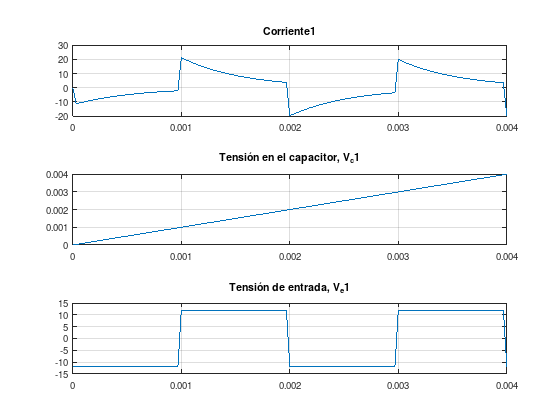

In [2]:
% Modelamos de nuevo el mismo sistema, pero con valores de R diferentes
R = 5.6e03;

A2 = [-R/L -1/L; 1/C 0];
B2 = [1/L; 0];
C2 = [R 0];
D2 = [0];


% Creamos modelo de espacio de estados
sys = ss(A2,B2,C2,D2);

[i,vc]=lsim(sys,u,t);

figure('Name', '1.2')
 subplot(3,1,1);plot(t,i);grid on; title('Corriente1');
 subplot(3,1,2);plot(t,vc);grid on; title('Tensión en el capacitor, V_c1');
 subplot(3,1,3);plot(t,u);grid on; title('Tensión de entrada, V_e1');

3- En el archivo Curvas_Medidas_RLC.xls (datos en la hoja 1 y etiquetas en la hoja 2) encontrarán las series de datos que deberían emplear para deducir los valores de R, L y C del circuito. Emplear el método de la respuesta al escalón, tomando como salida la tensión en el capacitor.

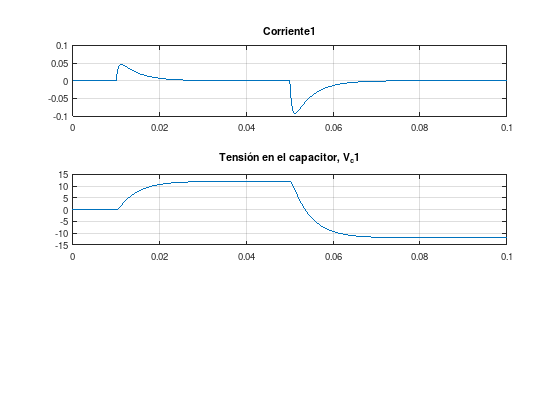

In [12]:
clear all;
%Cargamos los datos medidos
pkg load io
datos = csvread('Curvas_Medidas_RLC.csv');
t = datos(:,1);
i = datos(:,2);
v_c = datos(:,3);


figure('Name', '1.2')
 subplot(3,1,1);plot(t,i);grid on; title('Corriente1');
 subplot(3,1,2);plot(t,v_c);grid on; title('Tensión en el capacitor, V_c1');

td = 0.010000
t1 = 2.0000e-03
k = 11.999
k1 = -0.7110
k2 = -0.4494
k3 = -0.2830
alfa1 = 0.019027
alfa2 = 0.6298
beta = -2.2659
T1 = 5.0481e-04
T2 = 4.3258e-03

Transfer function 's' from input 'u1' to output ...

 y1:  s

Continuous-time model.

Transfer function 'sys_id' from input 'u1' to output ...

                    12              
 y1:  ------------------------------
      2.184e-06 s^2 + 0.004831 s + 1

Continuous-time model.


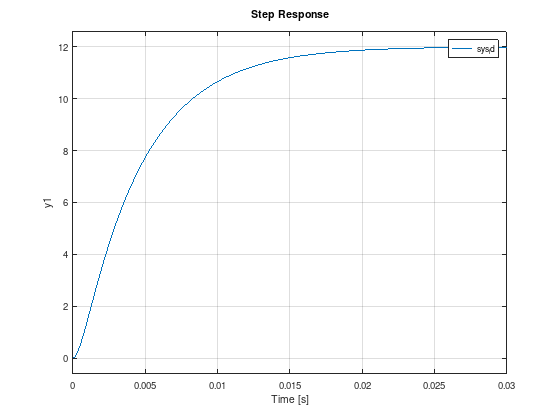

In [13]:
% Determinamos el modelo del circuito RLC a partir del metodo desarollado
% por Chen

td = 0.01
t1 = 0.002

k=max(v_c)

[val lugar] = min(abs((t1+td)-t));
k1 = v_c(lugar)/k-1
[val lugar] = min(abs((2*t1+td)-t));
k2 = v_c(lugar)/k-1
[val lugar] = min(abs((3*t1+td)-t));
k3 = v_c(lugar)/k-1

b=4*k1^3*k3-3*k1^2*k2^2-4*k2^3+k3^2+6*k1*k2*k3;
alfa1 = (k1*k2+k3-sqrt(b))/(2*(k1^2+k2))
alfa2 = (k1*k2+k3+sqrt(b))/(2*(k1^2+k2))
beta= (2*k1^3+3*k1*k2+k3-sqrt(b))/sqrt(b)

T1 =-t1/log(alfa1)
T2 =-t1/log(alfa2)
%T3 = beta*(T1-T2)+T1


s = tf('s')

%sys_id = k*(T3*s+1)/(T1*s+1)/(T2*s+1)
sys_id = k/(T1*s+1)/(T2*s+1)

step(sys_id)




In [18]:
% Contrastando con la función de transferencia del circuito RLC tenemos
% V_c/V = 1/(LCs^2+RC*s+1)
[N D] = tfdata(sys_id, "v")

N = 11.999
D =

   2.1837e-06   4.8306e-03   1.0000e+00



In [21]:
# 3 incógnitas para dos ecuaciones, definimos un valor razonable en C como por ejemplo 10uF
D
C = 10e-06
L = D(1)/C
R = D(2)/C



D =

   2.1837e-06   4.8306e-03   1.0000e+00

C = 1.0000e-05
L = 0.2184
R = 483.06


4- Una vez determinados los parámetros R, L y C, emplear la serie de corriente desde 0.05seg en adelante para validar el resultado.

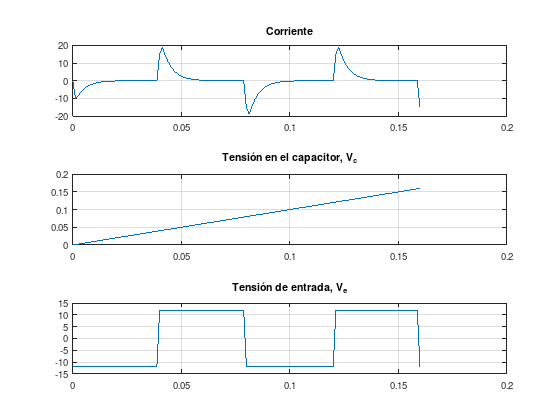

In [26]:
[u,t] = gensig("square",0.08,0.16);
u=24*u-12;

A1 = [-R/L -1/L; 1/C 0];
B1 = [1/L; 0];
C1 = [R, 0];
D1 = [0];

% Creamos modelo de espacio de estados
sys = ss(A1,B1,C1,D1);

[i,vc]=lsim(sys,u,t);

figure('Name','1.1')
 subplot(3,1,1);plot(t,i);grid on; title('Corriente');
 subplot(3,1,2);plot(t,vc);grid on; title('Tensión en el capacitor, V_c'); 
 subplot(3,1,3);plot(t,u);grid on; title('Tensión de entrada, V_e');